# Лабораторна робота №6
----
## Завдання №1
----

In [91]:
import numpy as np
import matplotlib.pyplot as plt
print("Ready!")

Ready!


## 1. Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу результатів.

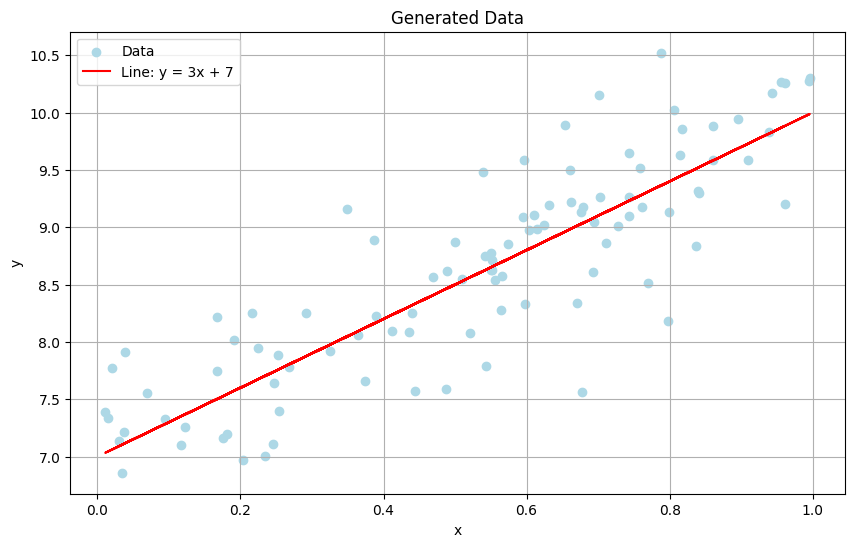

In [92]:
k = 3
b = 7
n = 100
x = np.random.rand(n)

mean = 0.1
std = 0.5
data = np.random.normal(mean, std, n)

y = k * x + b + data

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='lightblue', label='Data')
plt.plot(x, k * x + b, color='red', label='Line: y = {}x + {}'.format(k, b))
plt.title('Generated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [93]:
def squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    k_hat = (np.sum((x - x_mean) * (y - y_mean))) / (np.sum((x - x_mean)**2))
    b_hat = y_mean - k_hat * x_mean

    return k_hat, b_hat

k_hat, b_hat = squares(x, y)

print(f"True: k={k}, b={b}")
print(f"OLS:  k={k_hat}, b={b_hat}")

True: k=3, b=7
OLS:  k=2.9222124862975125, b=7.076823588823083


## 3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [94]:
polyfit = np.polyfit(x, y, 1)

poly_k = polyfit[0]
poly_b = polyfit[1]

k_poly, b_poly =  np.polyfit(x, y, 1)

print(f"True: k={k}, b={b}")
print(f"OLS:  k={k_hat}, b={b_hat}")
print(f"np.polyfit: k={poly_k}, b={poly_b}")
print(f"np.polyfit: k={k_poly}, b={b_poly}")

True: k=3, b=7
OLS:  k=2.9222124862975125, b=7.076823588823083
np.polyfit: k=2.9222124862975067, b=7.076823588823082
np.polyfit: k=2.9222124862975067, b=7.076823588823082


## 4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

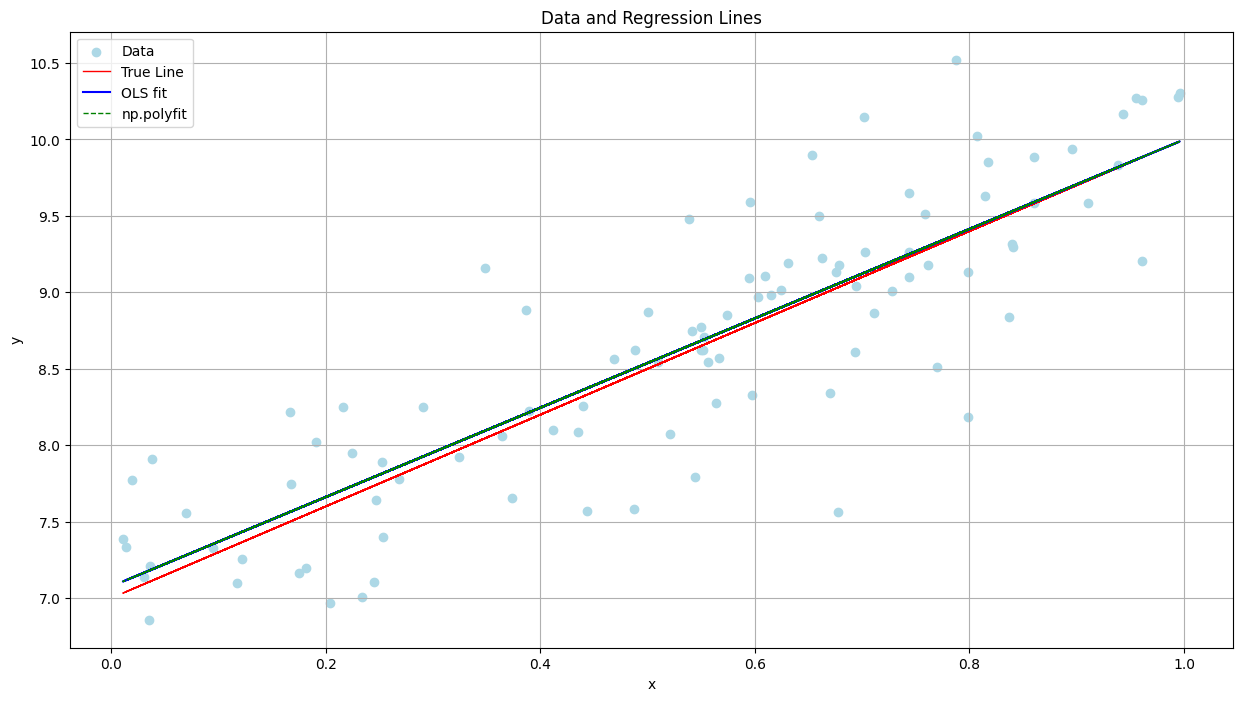

In [95]:
plt.figure(figsize=(15, 8))
plt.scatter(x, y, color='lightblue', label='Data')

plt.plot(x, k * x + b, color='red', label='True Line', linewidth=1)
plt.plot(x, k_hat * x + b_hat, color='blue', label='OLS fit', linewidth=1.5)
plt.plot(x, poly_k*x + poly_b, color='green', label='np.polyfit', linestyle='--', linewidth=1)


plt.title('Data and Regression Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Завдання №2
----

## 1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [96]:
def gradient(x, y, learning_rate=0.01, n_iter=1000, stopper=0.00001):
    k = 0
    b = 0
    errors = []
    n = len(x)
    for _ in range(n_iter):

        predicted = k * x + b
        
        error = np.mean((y - predicted) ** 2) 
        errors.append(error)
        
        gradient_k  = (-2 / n) * np.sum((y - predicted) * x)
        gradient_b  = (-2 / n) * np.sum(y - predicted)
        
        k = k - learning_rate * gradient_k
        b = b - learning_rate * gradient_b    

    return k, b, errors

k_grad, b_grad, errors = gradient(x, y)
print(f"Optimal k value estimate (GRAD): {k_grad}")
print(f"Optimal b value estimate (GRAD): {b_grad}")

Optimal k value estimate (GRAD): 3.1746407529329352
Optimal b value estimate (GRAD): 6.935432098882375


## 2. Додайте отриману лінію регресії на загальний графік

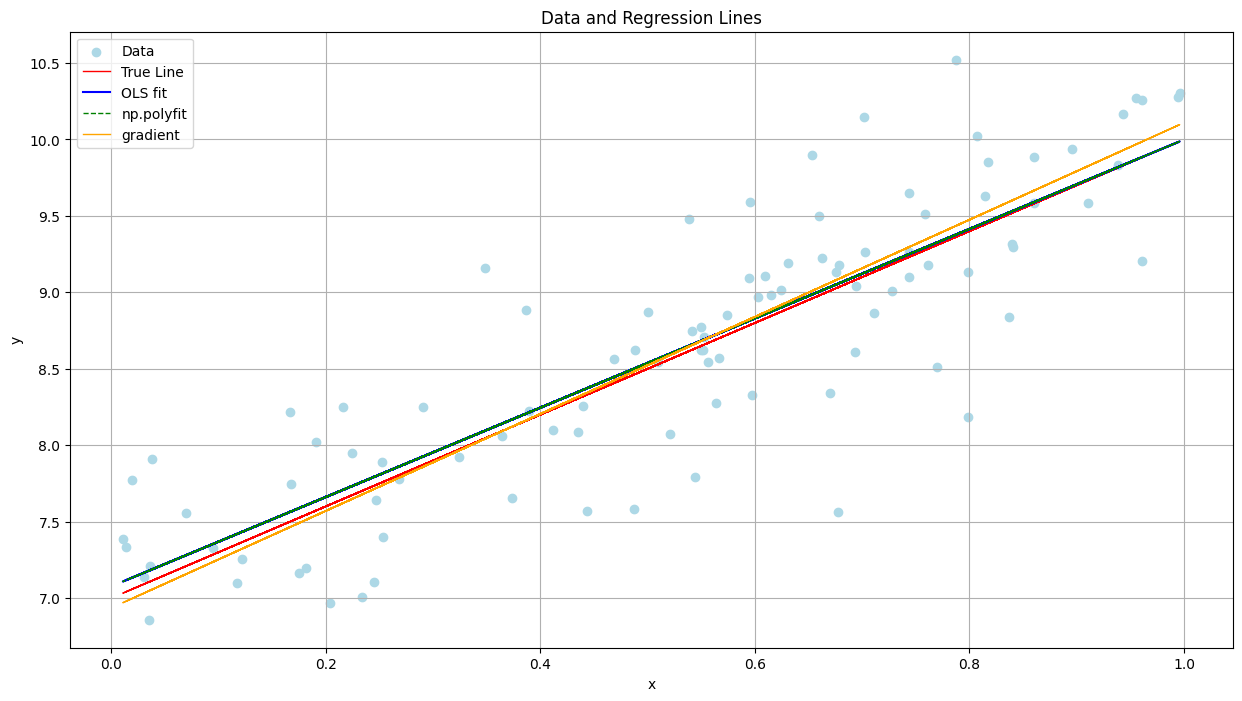

In [97]:
plt.figure(figsize=(15, 8))
plt.scatter(x, y, color='lightblue', label='Data')

plt.plot(x, k * x + b, color='red', label='True Line', linewidth=1)
plt.plot(x, k_hat * x + b_hat, color='blue', label='OLS fit', linewidth=1.5)
plt.plot(x, poly_k*x + poly_b, color='green', label='np.polyfit', linestyle='--', linewidth=1)
plt.plot(x, k_grad * x + b_grad, color='orange',  label='gradient', linewidth=1)


plt.title('Data and Regression Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

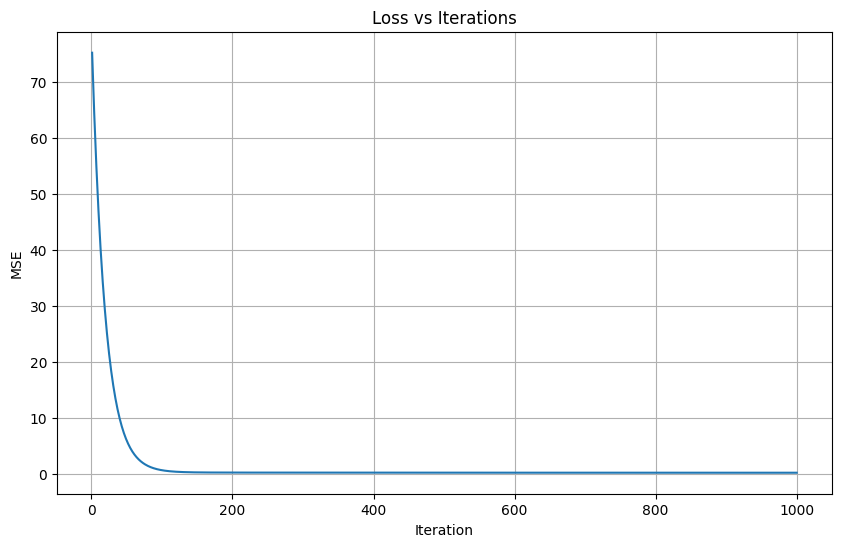

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors)

plt.title('Loss vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

## 4. Порівняйте отримані результати з результатами попереднього завдання

In [99]:
print(f"True: k={k}, b={b}")
print(f"OLS:  k={k_hat}, b={b_hat}")
print(f"np.polyfit: k={poly_k}, b={poly_b}")
print(f"Gradient: k={k_grad}, b={b_grad}")


True: k=3, b=7
OLS:  k=2.9222124862975125, b=7.076823588823083
np.polyfit: k=2.9222124862975067, b=7.076823588823082
Gradient: k=3.1746407529329352, b=6.935432098882375


# Висновки 

### - OLS (аналітичний) та `np.polyfit` дають ідентичні результати.
### - Градієнтний спуск при налаштованому learning rate дає майже такі ж результати, а ще навіть точніші. 
### - Для наших даних достатньо кількох десятків ітерацій, щоб досягти близької до оптимальної MSE.